# Pyber Challenge

In [1]:
#               Goal                     #
# Create Ride-Sharing Summary DF by CityType
#   ...Total Rides per CityType
#   ...Total Drivers per CityType
#   ...Average Fares by CityType
#   ...Average Fare per Ride
#   ...Average Fare by Driver
#   ...Relabel DF
#   ...Create Summary DF
#   ...Create a multiple line plot that shows the total weekly of the fares for each type of city

### 4.3 Loading and Reading CSV files

In [2]:
# Bring in Files & Setup Dependencies

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)


In [4]:
# Check to see if ride data loaded correctly
ride_data_df.head(10)


,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178
4,South Jack,3/6/2019 4:28,34.58,3908451377344
5,South Latoya,3/11/2019 12:26,9.52,1994999424437
6,New Paulville,2/27/2019 11:17,43.25,793208410091
7,Simpsonburgh,4/26/2019 0:43,35.98,111953927754
8,South Karenland,1/8/2019 3:28,35.09,7995623208694
9,North Jasmine,3/9/2019 6:26,42.81,5327642267789


In [5]:
# Check to see if city data loaded correclty
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


### Merge the DataFrames

In [6]:
# Combine Files to One DataFrame

In [7]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [8]:
# Create Data For Summary DataFrame

In [9]:
#  1. Get the total rides for each city type
Total_Rides_per_CityType = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_Rides_per_CityType

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [10]:
# 2. Get the total drivers for each city type
Total_Drivers_per_CityType = city_data_df.groupby(["type"]).sum()["driver_count"]
Total_Drivers_per_CityType

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [11]:
#  3. Get the total amount of fares for each city type
Total_Fare_per_CityType = pyber_data_df.groupby(["type"]).sum()["fare"]
Total_Fare_per_CityType

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#  4. Get the average fare per ride for each city type. 
Avg_Fare_per_Ride_CityType = Total_Fare_per_CityType / Total_Rides_per_CityType
Avg_Fare_per_Ride_CityType

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
# 5. Get the average fare per driver for each city type. 
Avg_Fare_per_Ride_DriverType = Total_Fare_per_CityType / Total_Drivers_per_CityType
Avg_Fare_per_Ride_DriverType

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
# Build Summary DataFrame

In [15]:
# Remove Index
Total_Rides_per_CityType.index.name = None
Total_Drivers_per_CityType.index.name = None
Total_Fare_per_CityType.index.name = None


In [16]:
#  6. Create a PyBer summary DataFrame. 
# Creating Column Names
pyber_summary_df = pd.DataFrame({
    "Total Rides" : Total_Rides_per_CityType,
    "Total Drivers" : Total_Drivers_per_CityType,
    "Total Fares" : Total_Fare_per_CityType,
    "Avg Fare per Ride": Avg_Fare_per_Ride_CityType,
    "Avg Fare per Driver" : Avg_Fare_per_Ride_DriverType,})

pyber_summary_df




,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [17]:
# Checking df types
pyber_summary_df.dtypes

Total Rides              int64
Total Drivers            int64
Total Fares            float64
Avg Fare per Ride      float64
Avg Fare per Driver    float64
dtype: object

In [18]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [19]:
#  8. Format the columns. comma for a thousands separator
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per Ride"] = pyber_summary_df["Avg Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Avg Fare per Driver"] = pyber_summary_df["Avg Fare per Driver"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Avg Fare per Ride,Avg Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [20]:
# 1. Read the merged DataFrame


pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


In [21]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
total_fare_per_day = pyber_data_df.groupby(['type','date']).sum()['fare']
total_fare_per_day

type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [22]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_per_day = total_fare_per_day.reset_index()
total_fare_per_day.head()

,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26


In [23]:
total_fare_per_day.dtypes

type     object
date     object
fare    float64
dtype: object

In [26]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_per_day_pivot = total_fare_per_day.pivot(index="date", columns="type", values="fare")
total_fare_per_day_pivot

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [34]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan_april_fare_per_day = total_fare_per_day_pivot.loc['1/1/2019':'4/29/2019']
jan_april_fare_per_day

type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
4/28/2019 4:34,NaN,NaN,40.46
4/28/2019 8:15,NaN,NaN,22.86
4/28/2019 9:03,NaN,NaN,15.00


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
jan_april_fare_per_day.index = pd.to_datetime(jan_april_fare_per_day.index)


In [36]:
# 7. Check that the datatype for the index is datetime using df.info()
jan_april_fare_per_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2057 entries, 2019-01-01 00:08:00 to 2019-04-28 09:25:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     105 non-null    float64
 1   Suburban  538 non-null    float64
 2   Urban     1416 non-null   float64
dtypes: float64(3)
memory usage: 64.3 KB


In [38]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = pd.DataFrame()
weekly_fares_df = jan_april_fare_per_day.resample('W').sum()
weekly_fares_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


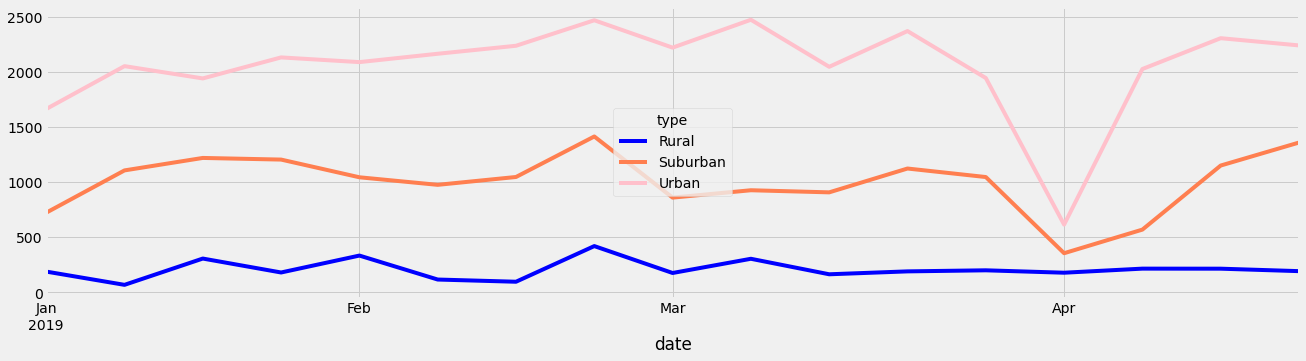

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_fares = weekly_fares_df.plot(figsize = (20,5), color = ['blue', 'coral', 'pink'])
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
# Save image
plt.savefig("Weekly Fares.png")
